This is not a numpy from ground up, but I try to use all the functions that numpy provides us to perform mathematical calculations

## Internal workings of numpy

### Basics
- Written mostly in C lang and python is just a wrapper around it
- Data is stored as contigeous block of memory that can be easily cached by CPU
- Single Instruction Multiple Data paradigm used instead of Loops
- ndarray is the wrapper around chunck of memory allocated in C

### Vectorization
- Vectorization is what sppeds up numpy computations
- Instead of using python loops, numpy calls its internal C code to perform operations that involves looping 
- Uses SIMD to execute the operation parallely

### Views
- Points to same memory location but with different dimentions (ex, using reshape in numpy)

### Linear Alg in numpy
- uses BLAS and LAPACK (optimized C and Fortran program) for matrix operations
- These are heavily CPU optimized codes 
- numpy does not parallalize comps by itself, BLAS and LAPACK does it 

### C order and F order
- C order stores rows contegeously
- F order stores columns contegeouly 

``` python
import numpy as np

# C-order (default)
arr_c = np.array([[1, 2, 3],
                  [4, 5, 6]], order='C')

# Fortran-order
arr_f = np.array([[1, 2, 3],
                  [4, 5, 6]], order='F')
arr_c:
[1, 2, 3, 4, 5, 6]  # stored row-wise

arr_f:
[1, 4, 2, 5, 3, 6]  # stored column-wise
```

### How data memory is managed internally
- WHen a ndarray is created, python creates a ndarray object but only stores the metadata such as pointer to location of data
- Data is allocated a memory using c code inside and all the operations are done by c code on this data
- When this object reference count goes to 0, the memory is de-allocated by c program 

Get in depth : https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

In [2]:
import numpy as np

In [3]:
# A general comparison between python loop and numpy 

def python_dot_prod(
        a: list,
        b: list
) -> float:
    
    z = 0.

    for i in range(len(a)):
        z += a[i] * b[i]
    
    return z

a = list(range(1000))
b = list(range(1000))

%timeit python_dot_prod(a,b)

49.7 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
def numpy_dot_prod(
        a: np.array,
        b: np.array
) -> float:
    
    return a.dot(b)

a = np.arange(1000)
b = np.arange(1000)

%timeit numpy_dot_prod(a,b)

1.01 µs ± 5.96 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [26]:
# Workout on how to get the address of memory block the data is in and use stried to manually move in them
lst = [[1, 2, 3], 
       [4, 5, 6]]
ary2d = np.array(lst,order='C',dtype='complex64')

print(ary2d)
print(ary2d.dtype)
print(ary2d.strides)
print(ary2d.flags)
print(ary2d.shape)

[[1.+0.j 2.+0.j 3.+0.j]
 [4.+0.j 5.+0.j 6.+0.j]]
complex64
(24, 8)
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

(2, 3)


In [61]:
# Construct an array

ones = np.ones((3,4),dtype='int32')
print(ones)
print(ones.strides)

zeros = np.zeros((3,4),dtype='int32')
print(zeros)

# arrays containing arbitrary values
sixtynines = np.zeros((3,4),dtype='int32') + 69
print(sixtynines)

# Identiy matrices using eye
eye = np.eye(4)
print(eye)

#linspace and ranges
ranges = np.arange(0.1,1.1,0.01)
print(ranges)

linspace = np.linspace(.5,1.5,10)
print(linspace)


# Interpolating
start_pos = np.array([0, 8])
end_pos = np.array([10, 100])

positions = np.linspace(start_pos, end_pos, num=10)
print(positions)

diag = np.diag([1,2,3])
print(diag)

eye_more = np.eye(5) + np.eye(5,k=1)
print(eye_more)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
(16, 4)
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[69 69 69 69]
 [69 69 69 69]
 [69 69 69 69]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07
 1.08 1.09]
[0.5        0.61111111 0.72222222 0.83333333 0.94444444 1.05555556
 1.16666667 1.27777778 1.38888889 1.5       ]
[[  0.           8.        ]
 [  1.11111111  18.22222222]
 [  2.22222222  28.44444444]
 [  3.33333333  38.66666667]
 [  4.44444444  48.88888889]
 [  5.55555556  59.11111111]
 [  6.66666667  69.33

In [ ]:
# math and ufuncs
ary = np.array([[1, 2, 3], [4, 5, 6]])
ary = np.add(ary,1)
print(ary)
ary + 1 #is also possible

#custom ufuncs using numba
from numba import vectorize, guvectorize

@vectorize(['float32(float32)','float64(float64)'],target='parallel')
def non_linear(x):
    return x**2 + x**3 + 34

new_ary = non_linear(ary)

print("new ary",new_ary)
print("ary",ary)

@guvectorize(['void(float64[:,:], float64[:,:])'], '(n,m) -> (n,m)')
def reducer(x,out):
    
    for i in range(x.shape[0]):
        out[i] = x[i]

new_ary_2 = reducer(ary)
print("new ary 2",new_ary_2)

@guvectorize(['void(float64[:], float64[:], float64[:], float64[:])'], '(n),(n),()->(n)')
def scale_and_add(x, y, scalar_array, out):
    scalar = scalar_array[0]
    for i in range(x.shape[0]):
        out[i] = x[i] + scalar * y[i]

x = np.array([1., 2., 3.])
y = np.array([4., 5., 6.])
s = np.array([2.])

result = scale_and_add(x, y, s)
print(result)

print(np.std(x))
print(np.var(x))

#Broadcaasting -> dimentions can be different but never numbewr of elements in each row
print(np.array([1,2,3]) + np.array([[12,34,56],[2,3,4]]))

print(np.array([1,2,3]) + np.array([[1],
                                    [2],
                                    [3]]))

[[2 3 4]
 [5 6 7]]
new ary [[ 46.  70. 114.]
 [184. 286. 426.]]
ary [[2 3 4]
 [5 6 7]]
new ary 2 [[2. 3. 4.]
 [5. 6. 7.]]
[[ 9. 12. 15.]]
0.816496580927726
0.6666666666666666
[[13 36 59]
 [ 3  5  7]]
[[2 3 4]
 [3 4 5]
 [4 5 6]]


In [45]:
# Indexing

# Normal indexing creats a view, which is just a pointer with differnt strides to orignal array
# Fancy indexsing is accesing non contegeous elements of the array and therefore creates a new array and not a view

arr = np.array([[1,2,3],
                [4,5,6]])

arr2 = arr[1] #creates a view

arr3 = arr[1].copy() #creates a copy
print(arr2)

fancy = arr[:,[0,1]] #fancy indexing, can be used for convolution 
print(fancy)

# Select elemets from array based on its index as a matrix
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

ind = np.array([[2,3],
                [4,7]])

print(x[ind])

[4 5 6]
[[1 2]
 [4 5]]
[51 92 14 71 60 20 82 86 74 74]
[[14 71]
 [60 86]]


Logical operators

- A: & or np.bitwise_and
- Or: | or np.bitwise_or
- Xor: ^ or np.bitwise_xor
- Not: ~ or np.bitwise_not

In [160]:
# masks

arr = np.array([[1,2,3],
                [4,5,6]])

even_mask = (arr % 2 == 0)

print(even_mask)

arr[even_mask]

# where to replace values
print(np.where(even_mask,69,0))

[[False  True False]
 [ True False  True]]
[[ 0 69  0]
 [69  0 69]]


In [ ]:
# reshape array -> creates a new view of same array

arr = np.array([[1,2,3],
                [4,5,6]])

arr_re = arr.reshape(3,2)

print(np.may_share_memory(arr,arr_re)) # confirms its a view and not copy
arr_re

print(arr.reshape(-1))
print(arr.flatten()) #view
print(arr.ravel()) #copy

True
[1 2 3 4 5 6]
[1 2 3 4 5 6]
[1 2 3 4 5 6]


In [156]:
# concatenating arrays

arr = np.array([[1,2,3],
                [4,5,6]])

print(np.concatenate((arr,arr),axis=0))
print(np.concatenate((arr,arr),axis=1))

[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]]


In [12]:
x = np.arange(10).reshape(5,2)

x % 7 # this is a ufunc

(0.5*x + 1) ** 2 # a fullblown function is also possible with this

array([[ 1.  ,  2.25],
       [ 4.  ,  6.25],
       [ 9.  , 12.25],
       [16.  , 20.25],
       [25.  , 30.25]])

In [18]:
# trig functions
theta = np.linspace(0, 90, 10)
theta

print(np.sin(theta))
print(np.cos(theta))

[ 0.         -0.54402111  0.91294525 -0.98803162  0.74511316 -0.26237485
 -0.30481062  0.77389068 -0.99388865  0.89399666]
[ 1.         -0.83907153  0.40808206  0.15425145 -0.66693806  0.96496603
 -0.95241298  0.6333192  -0.11038724 -0.44807362]


In [20]:
# lot of ufuncs in scipy special
from scipy import special

x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [22]:
x = np.arange(1, 6)
print(np.add.reduce(x))
print(np.add.accumulate(x))


15
[ 1  3  6 10 15]


In [26]:
# multi D aggregates

M = np.random.random((3, 4))
print(M)

print(M.sum())

print(M.sum(axis=1))
print(M.sum(axis=0))

[[0.71433103 0.98793678 0.8494997  0.82148753]
 [0.42839492 0.53029615 0.16245022 0.06092353]
 [0.27207152 0.94326655 0.02795935 0.59941203]]
6.39802931512255
[3.37325505 1.18206482 1.84270945]
[1.41479747 2.46149948 1.03990927 1.48182309]


In [38]:
print(bin(20))
print(bin(30))
print(bin(20 & 30))
print(bin(20 | 30))

0b10100
0b11110
0b10100
0b11110


In [ ]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)

print(A | B)
print(A & B)

[ True  True  True False  True  True]
[ True False  True False  True False]


In [84]:
# Building cov matrix and eigen values from it

X = np.array([
    [2.5, 2.4, 1.5],
    [0.5, 0.7, 1.3],
    [2.2, 2.9, 1.9],
    [1.9, 2.2, 1.6],
    [3.1, 3.0, 2.0]
])

#mean centering to find the cov matrix
x_centered = X - np.mean(X,axis=0)

print(x_centered)
print(x_centered.T)
print(np.dot(x_centered.T, x_centered))
print(X.shape)

cov_matrix = np.dot(x_centered.T, x_centered) / (x_centered.shape[0] - 1)
print(cov_matrix)

eigen_vals, eigen_vecs = np.linalg.eigh(cov_matrix)

print(eigen_vals)
print(eigen_vecs)

[[ 0.46  0.16 -0.16]
 [-1.54 -1.54 -0.36]
 [ 0.16  0.66  0.24]
 [-0.14 -0.04 -0.06]
 [ 1.06  0.76  0.34]]
[[ 0.46 -1.54  0.16 -0.14  1.06]
 [ 0.16 -1.54  0.66 -0.04  0.76]
 [-0.16 -0.36  0.24 -0.06  0.34]]
[[3.752 3.362 0.888]
 [3.362 3.412 0.948]
 [0.888 0.948 0.332]]
(5, 3)
[[0.938  0.8405 0.222 ]
 [0.8405 0.853  0.237 ]
 [0.222  0.237  0.083 ]]
[0.01332285 0.06232611 1.79835104]
[[ 0.16346444 -0.68418706 -0.71075133]
 [-0.41610001  0.60541123 -0.67848214]
 [ 0.89450554  0.40665134 -0.18572704]]


[  9.10882438 100.89117562]
[[ 10   9]
 [  9 100]]


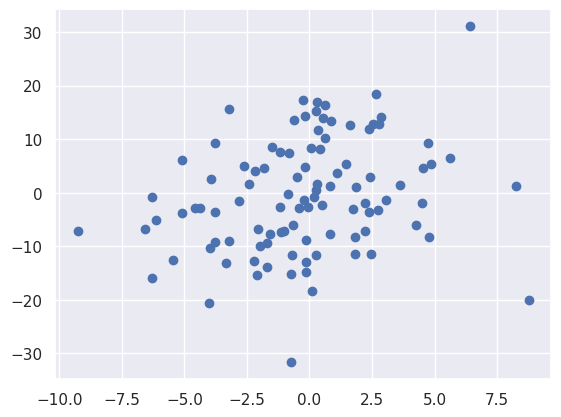

In [110]:
mean = [0,0]
cov = np.array([
       [10,9],
       [9,100]]
       )
print(np.linalg.eigvals(cov))
print(cov.T)
x = rand.multivariate_normal(mean,cov,100,check_valid='raise')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()  # for plot styling

plt.scatter(x[:, 0], x[:, 1])

In [ ]:
# Perform something at a particular index
x = np.zeros(10)
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
print(x)

np.add.at(x, i, 1)
print(x)

[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
[0. 0. 2. 3. 4. 0. 0. 0. 0. 0.]


In [ ]:
# binning

np.random.seed(42)
x = np.random.randn(100)

print(x)
bins = np.linspace(-5,5,20) #randn usually falls in this range

print(bins)
counts = np.zeros_like(bins)

i = np.searchsorted(bins,x)

np.add.at(counts, i, 1)

counts

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])